## IBM Quantum Challenge Fall 2021
# Challenge 1: Optimizing your portfolio with quantum computers

<div id='problem'></div>
<div class="alert alert-block alert-info">
    
Quantum Challengeに最適な環境で取り組んでいただくために、右上のアカウントメニューより **light** モードを選択されることをお勧めします。

## はじめに：ポートフォリオ最適化とは？
ポートフォリオの最適化は、投資から得られるリターンを最大化したいと考える人にとって大変重要なプロセスです。
投資は通常、いわゆる資産（株式、債権、債券、デリバティブ、コール、プットなど）の集まりであり、この資産の集まりを**ポートフォリオ**と呼びます。
<center><img src="resources/ex1-01.png" width="270"></center>
ポートフォリオの最適化のゴールは、リスク（金銭的損失）を最小化し、リターン（金銭的利益）を最大化することです。しかし、このプロセスはそう単純ではありません。リスクとリターンは通常トレードオフの関係にあり、これがポートフォリオの最適化を少し複雑にしています。ハリー・マーコウィッツ博士が1952年に発表した『現代ポートフォリオ理論』では、「リスクは、より高い報酬を得るための本質的な要素である」と述べています。

<div id='problem'></div>
<div class="alert alert-block alert-info">
    
**現代ポートフォリオ理論** 
<br>
投資家は同じリターンが期待できる2つのポートフォリオを与えられたとき、リスクの少ない方を好むというリスク回避の考え方に基づく投資理論。投資家は、与えられた市場リスクに基づいて、期待リターンを最大化するようにポートフォリオを構築することができ、リスクはより高い報酬の本質的な部分であることを強調している。現代ポートフォリオ理論は、金融・投資に関する最も重要かつ影響力のある経済理論の一つとして、1952年にハリー・マーコウィッツ博士が提唱し、この功績によりマーコウィッツ博士は1990年にノーベル経済学賞を受賞した。<br><br>
参照: [**現代ポートフォリオ理論**](https://en.wikipedia.org/wiki/Modern_portfolio_theory)

## Challenge

<div class="alert alert-block alert-success">

**Goal**

ポートフォリオの最適化は、投資から得られるリターンを最大化したいと考える人にとって大変重要なプロセスです。この最初のチャレンジでは、ポートフォリオ最適化の基本的な理論と、量子コンピューターで解けるように問題を定式化する方法を学びます。その過程で、QiskitのFinanceアプリケーションクラスをつかって、問題を効率的に解決する方法を学びます。

1. **Challenge 1a**: QiskitのFinanceモジュールのPortfolioOptimization()メソッドを使って、ポートフォリオ最適化を二次プログラムに変換する方法を学びます。
    
2. **Challenge 1b**: Challenge 1aで作成したインスタンスに基づいて、4銘柄のポートフォリオ最適化問題をVQE (Variational Quantum Eigensolver:変分量子固有値ソルバー) をつかって解きます。
    
    
3. **Challenge 1c**: QAOA(Quantum Approximate Optimazation Algorithm:量子近似最適化アルゴリズム)を使って、ポートフォリオがとりうる４つのアセットから、予算=3かつ、ひとつの銘柄につきダブルウェイトまでを選択できる場合の問題を解きます。

</div>
<div class="alert alert-block alert-info">

事前学習として[**Qiskit Finance Demo Session with Julien Gacon**](https://youtu.be/UtMVoGXlz04?t=2022)の視聴と対応する[**demo notebook**](https://github.com/qiskit-community/qiskit-application-modules-demo-sessions/tree/main/qiskit-finance)をチェックして、QiskitのFinanceモジュールとポートフォリオ最適化への応用について学ぶことをお勧めします。

</div>

## 1. 効率的フロンティアを求めて
現代ポートフォリオ理論（MPT）は、投資家にとって理想的なポートフォリオを決定するための理論的な枠組みを提供します。同理論は平均分散ポートフォリオ理論とも呼ばれ、投資家が以下のようなポートフォリオの集合から最適なポートフォリオを選択することを想定しています。
- 与えられたリスクに対して期待リターンを最大化する。
- 与えられたレベルの期待リターンに対して、リスクを最小化する。

下図は、横軸がリスク、縦軸が期待リターンを示す、現代ポートフォリオ理論の最小分散フロンティアです。 

<center><img src="resources/ex1-02.png" width="600"></center>

AとBの2つの銘柄があり、この2つの銘柄のどちらかに投資するという状況を考えてみましょう。あるいは、Aに10％、Bに90％、Aに20％、Bに80％、Aに70％、Bに30％などと投資することもできます。こうした2つの銘柄を考える場合の単純なケース下でもたくさんの投資パターンの組み合わせが考えられます。さらに何千もの銘柄を検討する場合には、膨大な数の組み合わせになります。

最小分散フロンティアは、ある想定される期待リターンに対して達成可能な最小分散を示します。あるポートフォリオの最小分散フロンティアを構築するには

- 過去のデータを用いて、ポートフォリオの各個別銘柄の平均、分散、および各組の銘柄の相関を推定する。
- コンピュータプログラムを使って、事前に設定した期待リターンごとに、ポートフォリオの分散を最小化する全銘柄の重みを求める。
- 上記で決定した最小分散ポートフォリオすべてについて、期待リターンと分散を計算し、2つの変数をグラフ化する。

このとき、投資家は最小分散点以下のポートフォリオを保有したいとは思わないでしょう。投資家は最小分散フロンティアの正の方向に傾斜した部分に沿って、常に高いリターンを得ることができるため、最小分散フロンティアの正の傾斜部分は、**効率的なフロンティア**と呼ばれています。

最適なポートフォリオがどこにあるかを示す**効率的フロンティア**を求めることによって、投資家はよりリターンを期待できそうな様々なポートフォリオはどれかを絞り込むことができます。

## 2. 演習の目的
この演習の目的は、量子的アプローチを用いて、ある特定のリスクに対する効率的フロンティアを見つけることです。QiskitのFinanceアプリケーションモジュールを使用して、ポートフォリオ最適化問題を二次計画問題に変換することで、VQEやQAOAなどの変分量子アルゴリズムを使用して最適化問題を解決していきます。それでは早速、今回のチャレンジ問題を見ていきましょう。

## 3. 四銘柄のポートフォリオ最適化問題

ここで、4銘柄(e.g. STOCK0, STOCK1, STOCK2, STOCK3) のポートフォリオ最適化問題を考えてみましょう。目標は、リスクとリターン間のトレードオフを最小化する2つの資産の組み合わせを見つけることです。

## 4. 問題の定式化

最適化問題については、検討している問題の定式化から行います。<br>
効率的フロンティアを記述する関数は、以下のように線形制約を持つ二次計画問題に定式化することができます。<br>
赤色で示されている用語はリスクに関連する項、青色で示されている項はリターンに関連するものです。
一般に、最適化したい関数は目的関数と呼ばれ、今回の目的は、このリスクとリターンのトレードオフを最小化することです。<br> <br>

<div align="center"> <font size=5em >$\min_{x \in \{0, 1\}^n}: $</font> <font color='red', size=5em >$q x^n\Sigma x$</font> - <font color='blue', size=5em>$\mu^n x$</font> </div>

<div align="center"> <font size=5em >$subject$</font> <font size=5em >$to: 1^n x = B$</font> </div>


- <font size=4em >$x$</font> は資産配分を示す。
- <font size=4em >$Σ$</font> (sigma) は、共分散行列です。
共分散行列は、2つの資産価格の値動きが互いにどのように相関しているかを統計的に示す指標で、金融工学で広く応用されています。共分散が高いということは、株価の値動きが激しく、ボラティリティーが高いことを意味します。そのため、この指数は、全体のリスクを減らすためにどのような資産をポートフォリオに含めるべきかを判断するのに役立ちます。
- <font size=4em >$q$</font> iはリスクファクター（リスク許容度）と呼ばれ、個人のリスクを取る意思や能力を評価したものです。
例えば、自動化されたファイナンシャル・アドバイジング・サービス、いわゆるロボ・アドバイジングを利用する際には、通常、異なるリスク許容度が表示されます。このq値はそのようなものと同じで、0から1の間の値をとります。
- <font size=4em >$𝝁$</font> (mu) は期待リターンで、当然ながら最大化を目指します。
- <font size=4em >$n$</font> は選択可能なアセットの数です。
- <font size=4em >$B$</font> はBudget（予算）の略ですが、ここでいう「予算」とは、ポートフォリオに割り当てることのできる資産の数を意味します。

#### ゴール:
ゴールは**x**値を見つけることです。ここでいうx値とは、どの資産を選ぶか（𝑥[𝑖]=1）、どの資産を選ばないか（𝑥[𝑖]=0）を示すものです。


#### 仮定:
この演習では、簡単のために以下を仮定しています。
- すべての資産の価格は同じである（1に正規化）。
- 予算$B$をすべて使わなければならない、つまり、正確に$B$個の資産を選択しなければならない。
- 等式制約 $1^n x = B$ はペナルティ項 $(1^n x - B)^2$ にマッピングされ、このペナルティ項はパラメータでスケーリングされ、目的関数から減算される。



## Step 1. 必要なライブラリをインポートします。

In [2]:
#Let us begin by importing necessary libraries.
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import *
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit.utils import algorithm_globals
from qiskit_finance import QiskitFinanceError
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import *
from qiskit_optimization.algorithms import MinimumEigenOptimizer 
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
from sympy.utilities.exceptions import SymPyDeprecationWarning
warnings.simplefilter("ignore", SymPyDeprecationWarning)

Matplotlib is building the font cache; this may take a moment.


## Step 2. 時系列データ（金融データ）の生成
まず、全銘柄数n=4のランダムな時系列金融データを生成してみましょう。これにはRandomDataProviderを使います。ここではある4銘柄について、過去にさかのぼって、1955年11月5日から1985年10月26日までの金融データを取得しています。

In [3]:
# Set parameters for assets and risk factor
num_assets = 4     # set number of assets to 4
q = 0.5                   # set risk factor to 0.5
budget = 2           # set budget as defined in the problem
seed = 132     #set random seed

# Generate time series data
stocks = [("STOCK%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers=stocks,
                 start=datetime.datetime(1955,11,5),   
                 end=datetime.datetime(1985,10,26),  
                 seed=seed)
data.run()

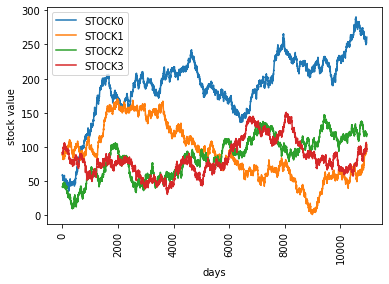

In [4]:
# Let's plot our finanical data
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('days')
plt.ylabel('stock value')
plt.show()

<div id='problem'></div>
<div class="alert alert-block alert-danger">
    
**注意**： このチャレンジノートブック中のRandomDataProvider にセットされた開始日と終了日は変更しないでください。変更した場合、提出された回答は正しく評価されません。
</div>

## Step 3. 期待リターンと共分散行列の取得

まず、期待リターンと共分散行列を計算しましょう。

## 期待リターン μ
ポートフォリオの期待リターンとは、ポートフォリオが生み出す可能性のあるリターンの予想値であり、ポートフォリオの可能なリターン分布の平均（平均値）となります。
例えば、銘柄A、B、Cがそれぞれ50％、20％、30％の割合でポートフォリオに組み込まれていたとします。 各銘柄の期待リターンがそれぞれ15％、6％、9％だった場合、ポートフォリオの期待リターンの計算式は以下のようになります。<br>


<div align="center"> μ = (50% x 15%) + (20% x 6%) + (30% x 9%) = 11.4% </div>


QiskitのRandomDataProviderが提供する以下の`get_period_return_mean_vector()`メソッドを使用することで、先ほど生成した時系列データについて、期待リターンを計算することができます。

In [5]:
#Let's calculate the expected return for our problem data

mu = data.get_period_return_mean_vector()   # Returns a vector containing the mean value of each asset's expected return.

print(mu)

[1.59702144e-04 4.76518943e-04 2.39123234e-04 9.85029012e-05]


### 共分散行列 Σ
共分散Σは、2つの資産の平均リターンが互いにどのように変化するかを示す統計的な尺度で、投資ポートフォリオの観点からリスクの大きさを理解し、株式の売買を決定するのに役立ちます。

自分のポートフォリオにn個の銘柄がある場合、共分散行列の大きさはn×nとなります。
今回の4銘柄のポートフォリオの共分散行列をプロットすると、4×4の行列になります。

[[ 4.88319903e-05 -1.07868619e-06 -2.12961489e-06  7.06600109e-07]
 [-1.07868619e-06  9.97360142e-04  3.51594354e-06  3.68715793e-07]
 [-2.12961489e-06  3.51594354e-06  2.87365468e-04  3.20819120e-06]
 [ 7.06600109e-07  3.68715793e-07  3.20819120e-06  1.92316728e-04]]


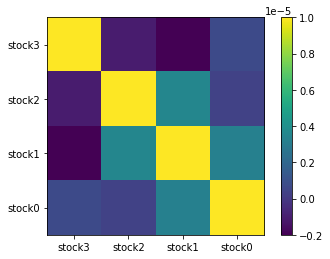

In [7]:
# Let's plot our covariance matrix Σ（sigma）
sigma = data.get_period_return_covariance_matrix() #Returns the covariance matrix of the four assets
print(sigma)

fig, ax = plt.subplots(1,1)
im = plt.imshow(sigma, extent=[-1,1,-1,1])
x_label_list = ['stock3', 'stock2', 'stock1', 'stock0']
y_label_list = ['stock3', 'stock2', 'stock1', 'stock0']
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
plt.colorbar()
plt.clim(-0.000002, 0.00001)
plt.show()

左から右への対角成分（下図の黄色で示された値）は、ある銘柄の「自身」との関係を示しています。また、非対角線上の値は、各銘柄の平均期待収益率の互いの偏差を示しています。 共分散行列の簡単な見方は次の通りです。

 - 2つの銘柄が同時に増加・減少すれば、共分散の値は正の値になります。
 - 一方が上昇し、他方が下降した場合、共分散の値は負になります。

<center><img src= "resources/ex1-05.png" width="370"></center>

"Don't Put All Your Eggs in One Basket （卵は一つのカゴに盛るな）"という言葉を聞いたことがあるかもしれません。常に同じ方向に動くものに投資していると、同時にすべての資金を失うリスクがあります。共分散行列は、そのようなリスクを減らすために、投資家が資産を分散させるのに役立つ指標です。

これで、最適化のためのポートフォリオを構築するために必要なすべての値が揃ったので、ポートフォリオを二次計画問題に定式化し、最適化問題に落とし込んでくれるのを手助けしてくれるQiskit Financeのアプリケーションクラスをみていきましょう。

### Qiskit Finance のポートフォリオ最適化クラス

ステップ2からステップ4までのなかで計算したポートフォリオを特徴づける値を入力としえ、[`PortfolioOptimization(ポートフォリオ最適化クラス)`](https://qiskit.org/documentation/finance/stubs/qiskit_finance.applications.PortfolioOptimization.html#qiskit_finance.applications.PortfolioOptimization) をつかってポートフォリオ・インスタンスをつくります。

PortfolioOptimization クラスは以下 **５つの引数** をとり、そのインスタンスを二次計画問題に変換する準備を行います。
- expected_returns
- covariances
- risk_factor
- budget
- bounds

ポートフォリオのインスタンスが二次計画問題に変換されれば、変分量子固有値ソルバー（VQE）や量子近似最適化アルゴリズム（QAOA）などの量子変分法を用いて、問題の最適解を求めることができます。<br>

ポートフォリオの資産選択の変数がバイナリ変数の場合、「bounds = None」と設定してください。

すでにステップ3で期待リターンと共分散を得ており、リスクファクターとバジェットも事前に定義されています。それでは、 [`PortfolioOptimization`](https://qiskit.org/documentation/finance/stubs/qiskit_finance.applications.PortfolioOptimization.html#qiskit_finance.applications.PortfolioOptimization) クラスを使って、ポートフォリオを構築してみましょう。

## Challenge 1a: PortfolioOptimizationクラスを使用したポートフォリオインスタンスの作成
<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Challenge 1a** <br>
[PortfolioOptimization](https://qiskit.org/documentation/finance/stubs/qiskit_finance.applications.PortfolioOptimization.html#qiskit_finance.applications.PortfolioOptimization) クラスを使って、ポートフォリオのインスタンスを生成するコードを完成させてください。**5つの引数**に前ステップで取得した値を代入し、インスタンスを二次計画問題 **qp** に変換してください。
</div>

In [8]:
##############################
# 以下にコードを入力

portfolio = PortfolioOptimization(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget, bounds=None)
qp = portfolio.to_quadratic_program()

##############################
print(qp)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: - 0.000159702144 x_0 - 0.000476518943 x_1 - 0.000239123234 x_2
      - 0.000098502901 x_3 + [ 0.000048831990 x_0^2 - 0.000002157372 x_0*x_1
      - 0.000004259230 x_0*x_2 + 0.000001413200 x_0*x_3 + 0.000997360142 x_1^2
      + 0.000007031887 x_1*x_2 + 0.000000737432 x_1*x_3 + 0.000287365468 x_2^2
      + 0.000006416382 x_2*x_3 + 0.000192316728 x_3^2 ]/2
Subject To
 c0: x_0 + x_1 + x_2 + x_3 = 2

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



If you were able to successfully generate the code, you should see a standard representation of the formulation of our qudratic program. 

In [ ]:
# 答えを確認して以下のコードで提出します
from qc_grader import grade_ex1a
grade_ex1a(qp)

Submitting your answer for 1a. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Minimum Eigen Optimizer（最小固有値オプティマイザー）

興味深いことに、このポートフォリオ最適化問題は、ハミルトニアンの基底状態を求める問題として解くことができます。ハミルトニアンとは、シミュレーションしたい物理系の全エネルギーを表すエネルギー関数と考えることができます。この物理系は、さらに [**イジングモデル**](https://en.wikipedia.org/wiki/Ising_model) と呼ばれる数学モデルで表現することができます。この数学モデルは、バイナリ変数をスピンアップ(+1)またはスピンダウン(-1)と呼ばれる状態に変換するためのフレームワークを提供します。
    
最適化アルゴリズムを適用する際には、通常、適性なフォーマットに変換して適用可能な状態にする必要があります。今回適用するVQEやQAOAのような変分量子アルゴリズムは[**二次非制約二次最適化(QUBO)**](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization)問題に適用するため, Qiskitは自動的に適切なフォーマットにマッピングするコンバータを提供します。

<center><img src= "resources/ex1-04.png" width="700"></center>

QUBOを解くことは、ハミルトニアンの基底状態を求めることに相当します。Minimum Eigen Optimizer（最小固有値オプティマイザー）は、二次プログラムをハミルトニアンに変換し、VQEやQAOAなどの所定の最小固有値ソルバーを呼び出して基底状態を計算し、最適化の結果を返します。
    
このアプローチにより、最適化問題を解く際に基底状態の計算を利用することができます。次のステップの課題でこの手続きを実装してみましょう。

## Step 5. 古典的なオプティマイザーで参考値を取得

参考値として、今回の最適化問題解の理論値をさNumPyMinimumEigensolverを使ってまずは取得します。問題は「ising」に設定しています。量子計算ではなく古典的に計算されるので、バックエンドは必要ありません。結果はdictionary型として返されます。

In [16]:
exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)
result = exact_eigensolver.solve(qp)

print(result)

optimal function value: -0.00023285626449450194
optimal value: [1. 0. 1. 0.]
status: SUCCESS


<div id='problem'></div>
<div class="alert alert-block alert-info">
    
**注:** ここで表示されるOptimal Valueとは、どの銘柄が選択されたかを示しています。例えばOptimal Value [1. 1. 0. 0.] は STOCK2とSTOCK3が選択されたポートフォリオを意味します。
    
</div>

## Challenge1b: VQEをつかったソリューション

**Variational Quantum Eigensolver (VQE)**は、古典と量子のハイブリッドアルゴリズムであり、 [**Hamiltonian**](https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics))の基底エネルギー(最も低いエネルギー状態)を効率的に計算するために、処理負荷の一部を古典計算機に託します。 先ほど説明したように、二次プログラムを[**VQE**](https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html) で解く基底状態エネルギーの探索問題として再構築することができます。この課題では、VQEを用いて最適解を求めます。  <br> 


<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Challenge 1b** <br>
Variational Quantum Eigensolver(VQE)を使って同じ最適解を求めます。以下に使用するオプティマイザー(optimizer)と変分形式を指定します。
</div>

<div id='problem'></div>
<div class="alert alert-block alert-info">

**ヒント**: 行き詰まったら、Qiskitの[**ポートフォリオ最適化のチュートリアル**](https://qiskit.org/documentation/finance/tutorials/01_portfolio_optimization.html)を参考に問題設定に応じて適宜コードを調整してください。
    
</div>

以下にとりかかりのためのコードを提供します。######で区切られた箇所にご自身のコードを入力ください。

In [20]:
optimizer = SLSQP(maxiter=1000)  
algorithm_globals.random_seed = 1234
backend = Aer.get_backend('statevector_simulator')


##############################
# Provide your code here

ry = TwoLocal(num_assets, 'ry', 'cz', reps=3, entanglement='full')
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

vqe = VQE(ry, optimizer=optimizer, quantum_instance=quantum_instance)


##############################

vqe_meo = MinimumEigenOptimizer(vqe)  #please do not change this code

result = vqe_meo.solve(qp)  #please do not change this code

print(result)    #please do not change this code

optimal function value: -0.00023285626449450194
optimal value: [1. 0. 1. 0.]
status: SUCCESS


In [19]:
# 答えを確認して以下のコードで提出します
from qc_grader import grade_ex1b
grade_ex1b(vqe, qp)

Submitting your answer for 1b. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


古典のオプティマイザーから得られた基準解と同じ最適解がVQEでも求まるはずです。

## Challenge 1c: B=3, n=4 銘柄のポートフォリオ最適化問題

このチャレンジ演習では、同じ問題を、今度はB=3で、1つの銘柄を２つ保有できる場合を考えていきます。(例えば、STOCK3を2つ保有、STOCK2を1つ保有した場合のポートフォリオは[2, 1, 0, 0]となります。また、STOCK0、STOCK1、STOCK02をそれぞれ、１株ずつ保有した場合、ポートフォリオは[0, 1, 1, 1]となります。) <br>
この新しい制約条件を用いて、リスクとリターンのトレードオフを最小化する最適なポートフォリオを求めてください。

<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**チャレンジ 1c:** <br>
PortfolioOptimization クラスを使用して、ポートフォリオのインスタンスを生成するコードを完成させます。<br>。
予算=3の場合、1つの資産に2倍のウェイトを割り当てることができる最適なポートフォリオを見つけてください。<br>。
最後にQAOAを使って最適解を見つけ、答えを提出してください。
    
</div>

<div id='problem'></div>
<div class="alert alert-block alert-info">
    
**ヒント:**  STOCK0, STOCK1, STOCK2, STOCK3のどれでも、ポートフォリオの中で2倍のウェイトを持つことができるケースです。整数変数に対応するためには、どのようにコードを変更すればよいでしょうか。 <br>
</div>

## Step 1: 必要なライブラリをインポートします。

In [34]:
#Step 1: Let us begin by importing necessary libraries
import qiskit
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import *
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit.utils import algorithm_globals
from qiskit_finance import QiskitFinanceError
from qiskit_finance.applications.optimization import *
from qiskit_finance.data_providers import *
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
from sympy.utilities.exceptions import SymPyDeprecationWarning
warnings.simplefilter("ignore",SymPyDeprecationWarning)

以下にとりかかりのためのコードを提供します。######で区切られた箇所にご自身のコードを入力ください。

## Step 2: 時系列データ（金融データ）の生成

In [35]:
# Step 2. Generate time series data for four assets. 
# Do not change start/end dates specified to generate problem data.
seed = 132 
num_assets = 4
stocks = [("STOCK%s" % i) for i in range(num_assets)]
data = RandomDataProvider(tickers=stocks,
                 start=datetime.datetime(1955,11,5),   
                 end=datetime.datetime(1985,10,26),  
                 seed=seed)
data.run()

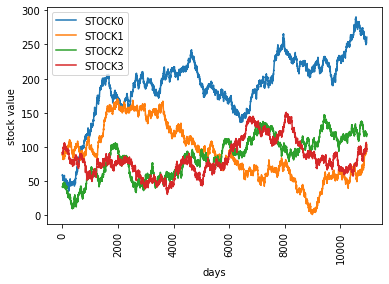

In [36]:
# Let's plot our finanical data (We are generating the same time series data as in the previous example.)
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('days')
plt.ylabel('stock value')
plt.show()

## Step 3: 期待リターンと共分散行列の取得

In [37]:
# Step 3. Calculate mu and sigma for this problem

mu2 = data.get_period_return_mean_vector()   #Returns a vector containing the mean value of each asset.
sigma2 = data.get_period_return_covariance_matrix() #Returns the covariance matrix associated with the assets.
print(mu2, sigma2)

[1.59702144e-04 4.76518943e-04 2.39123234e-04 9.85029012e-05] [[ 4.88319903e-05 -1.07868619e-06 -2.12961489e-06  7.06600109e-07]
 [-1.07868619e-06  9.97360142e-04  3.51594354e-06  3.68715793e-07]
 [-2.12961489e-06  3.51594354e-06  2.87365468e-04  3.20819120e-06]
 [ 7.06600109e-07  3.68715793e-07  3.20819120e-06  1.92316728e-04]]


## Step 4: チャレンジ1cの問題設定に基づく変数設定を行ってください。

In [53]:
# Step 4. Set parameters and constraints based on this challenge 1c

##############################
# Provide your code here

q2 = 0.5     #Set risk factor to 0.5
budget2 = 3     #Set budget to 3

##############################

## Step 5: ポートフォリオ・インスタンスを生成するコードを完成させてください。

In [59]:
# Step 5. Complete code to generate the portfolio instance


##############################
# Provide your code here

bounds = [(0,2) for i in range(num_assets)]
portfolio2 = PortfolioOptimization(expected_returns=mu2, covariances=sigma2, risk_factor=q2, budget=budget2, bounds=bounds)
qp2 = portfolio2.to_quadratic_program()
print(qp2)

##############################

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: - 0.000159702144 x_0 - 0.000476518943 x_1 - 0.000239123234 x_2
      - 0.000098502901 x_3 + [ 0.000048831990 x_0^2 - 0.000002157372 x_0*x_1
      - 0.000004259230 x_0*x_2 + 0.000001413200 x_0*x_3 + 0.000997360142 x_1^2
      + 0.000007031887 x_1*x_2 + 0.000000737432 x_1*x_3 + 0.000287365468 x_2^2
      + 0.000006416382 x_2*x_3 + 0.000192316728 x_3^2 ]/2
Subject To
 c0: x_0 + x_1 + x_2 + x_3 = 3

Bounds
       x_0 <= 2
       x_1 <= 2
       x_2 <= 2
       x_3 <= 2

Generals
 x_0 x_1 x_2 x_3
End



## Step 6: QAOAをつかったソリューション

**Quantum Approximate Optimization Algorithm(QAOA)** は、もう一つの変分量子アルゴリズムで、小中規模のノイズ有の量子デバイス上での組合せ最適化問題を解くのに応用されています。このアルゴリズムはハミルトニアンの基底状態を求めるのにも使われており、Qiskitの[**QAOA**](https://qiskit.org/documentation/stubs/qiskit.algorithms.QAOA.html) アプリケーションをつかって簡単に実装することができます。（QAOAについては第4回の課題でより詳しい解説が予定されています。この演習ではまず、Qiskitを使ったQAOAの基本的な実装に焦点を当てています)。

In [60]:
# Step 6. Now let's use QAOA to solve this problem. 

optimizer = SLSQP(maxiter=1000)  
algorithm_globals.random_seed = 1234
backend = Aer.get_backend('statevector_simulator')

##############################
# Provide your code here 

quantum_instance2 = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
qaoa = QAOA(optimizer=optimizer, reps=3, quantum_instance=quantum_instance2)

def index_to_selection(i, num_assets):
    s = "{0:b}".format(i).rjust(num_assets)
    x = np.array([1 if s[i]=='1' else 0 for i in reversed(range(num_assets))])
    return x

def print_result(result):
    selection = result.x
    value = result.fval
    print('Optimal: selection {}, value {:.4f}'.format(selection, value))

    eigenstate = result.min_eigen_solver_result.eigenstate
    eigenvector = eigenstate if isinstance(eigenstate, np.ndarray) else eigenstate.to_matrix()
    probabilities = np.abs(eigenvector)**2
    i_sorted = reversed(np.argsort(probabilities))
    print('\n----------------- Full result ---------------------')
    print('selection\tvalue\t\tprobability')
    print('---------------------------------------------------')
    for i in i_sorted:
        x = index_to_selection(i, num_assets)
        value = QuadraticProgramToQubo().convert(qp).objective.evaluate(x)
        #value = portfolio.to_quadratic_program().objective.evaluate(x)
        probability = probabilities[i]
        print('%10s\t%.4f\t\t%.4f' %(x, value, probability))

##############################

qaoa_meo = MinimumEigenOptimizer(qaoa) #please do not change this code

result2 = qaoa_meo.solve(qp2)  #please do not change this code

print_result(result2)
# print(result2) #please do not change this code

Optimal: selection [2. 0. 1. 0.], value -0.0003

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
 [0 0 0 1]	1.0017		0.0150
 [1 0 0 1]	-0.0001		0.0150
 [0 1 1 1]	1.0017		0.0150
 [1 0 1 1]	1.0015		0.0150
 [0 1 1 1]	1.0017		0.0150
 [1 1 0 1]	1.0016		0.0150
 [0 1 1 1]	1.0017		0.0149
 [1 1 0 1]	1.0016		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [1 0 1 1]	1.0015		0.0149
 [0 1 1 1]	1.0017		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [1 0 1 1]	1.0015		0.0149
 [0 1 1 1]	1.0017		0.0149
 [0 0 0 1]	1.0017		0.0149
 [0 0 0 1]	1.0017		0.0149
 [1 0 0 1]	-0.0001		0.0149
 [0 0 0 1]	1.0017		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [0 0 1 1]	-0.0001		0.0149
 [0 1 0 1]	0.0000		0.0149
 [1 0 0 1]	-0.0001		0.0149
 [0 1 0 1]	0.0000		0.0149
 [1 0 0 1]	-0.0001		0.0149
 [0 1 0 1]	0.0000		0.0149
 [0 1 0 1]	0.0000		0.0149
 [1 1 0 1]	1.0016		0.0149


注：QAOAの実行には最大で数分かかることがあります。

# 回答を提出する

In [61]:
# 答えを確認して以下のコードで提出します
from qc_grader import grade_ex1c
grade_ex1c(qaoa, qp2)

Submitting your answer for 1c. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 更に学びたい方へ:
入門レベルの最初のチャレンジを無事に解いた皆さん、**おめでとうございます！** <br>
ポートフォリオ最適化について、またQiskitのFinanceモジュールを使った演習を解く方法について学ぶことができたのではないでしょうか。<br>今回登場した変分量子アルゴリズムをつかった最適化問題について更に深く学びたい方は以下の文献をご覧ください。
<br>
1. [**Quantum optimization using variational algorithms on near-term quantum devices. Moll et al. 2017**](https://arxiv.org/abs/1710.01022)<br>
2. [**Improving Variational Quantum Optimization using CVaR. Barkoutsos et al. 2019.**](https://arxiv.org/abs/1907.04769)<br>

### Good luck and have fun with the challenge!

## Additional information

**Created by:** Yuri Kobayashi

**Version:** 1.0.1